In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
data = pd.read_excel("D:/others/桌面/试验数据.xlsx")
data.head()

,是否发生灾害（1发生）,NDVI平均,坡度,其他,其他.1
0,1,0.694439,9.79986,19.79986,119.79986
1,1,0.729185,33.81680,33.81680,133.81680
2,1,0.677152,45.57890,45.57890,145.57890
3,1,0.800604,17.27560,17.27560,117.27560
4,1,0.738911,53.31280,53.31280,153.31280


In [18]:
X = data.iloc[:, data.columns != '是否发生灾害（1发生）']
y = data.iloc[:, data.columns == '是否发生灾害（1发生）']

In [19]:
X.head()

,NDVI平均,坡度,其他,其他.1
0,0.694439,9.79986,19.79986,119.79986
1,0.729185,33.81680,33.81680,133.81680
2,0.677152,45.57890,45.57890,145.57890
3,0.800604,17.27560,17.27560,117.27560
4,0.738911,53.31280,53.31280,153.31280


In [20]:
y.head()

,是否发生灾害（1发生）
0,1
1,1
2,1
3,1
4,1


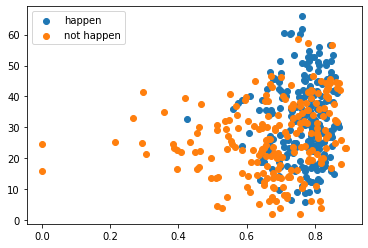

In [21]:
plt.scatter(X["NDVI平均"][y["是否发生灾害（1发生）"]==1], X["坡度"][y["是否发生灾害（1发生）"]==1], label="happen")
plt.scatter(X["NDVI平均"][y["是否发生灾害（1发生）"]==0], X["坡度"][y["是否发生灾害（1发生）"]==0], label="not happen")
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=500, random_state=666, oob_score=True, n_jobs=-1)
rf_clf.fit(X,y)
rf_clf.oob_score_

<ipython-input-22-28298a7c6713>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X,y)


0.6581395348837209

In [23]:
rf_clf.feature_importances_

array([0.38091195, 0.18453144, 0.21893185, 0.21562476])

In [8]:
rf_clf2 = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16,random_state=666, oob_score=True, n_jobs=-1)
rf_clf2.fit(X,y)
rf_clf2.oob_score_

<ipython-input-8-fd9e6de10ed6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf2.fit(X,y)


0.6767441860465117

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_clf2.fit(X_train, y_train)
rf_clf2.oob_score_

<ipython-input-10-c0e337e54e03>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf2.fit(X_train, y_train)


0.6453488372093024

In [11]:
rf_clf2.fit(X_test, y_test)
rf_clf2.oob_score_

<ipython-input-11-956e5df16fdb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf2.fit(X_test, y_test)


0.7325581395348837